In [103]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy
from sklearn.decomposition import PCA

import os

#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
from index_helpers import load_Kp, load_ae, load_Dst, load_TS_params
from index_helpers import Kp_at, Ae_at
from index_helpers import datetime2matlabdn, matlabdn2datetime

# --------------- Latex Plot Beautification --------------------------
fig_width = 8  # width in inches
fig_height = 8      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
start_time = dt.datetime(2001,1,1,0,0,0)
stop_time  = dt.datetime(2010,1,1,0,0,0)
timestep   = dt.timedelta(hours=3)

cur_time   = start_time


tvec = []

dnvec = []
kvec = []
avec = []
dvec = []

# Create time axis
while (cur_time < stop_time):
    tvec.append(cur_time)
    dnvec.append(datetime2matlabdn(cur_time))
    
    cur_time += timestep

# Interpolate Kp and Ae    
k_t, kpraw = load_Kp()
a_t, aeraw = load_ae()
kinterp = interp1d([datetime2matlabdn(t) for t in k_t], kpraw)
ainterp = interp1d([datetime2matlabdn(t) for t in a_t], aeraw)
Kp = kinterp(dnvec)
Ae = np.log10(ainterp(dnvec))

# Interpolate Dst
dstfile = '/shared/users/asousa/software/vlf_matlabwork/indices/dst.mat'
dd = scipy.io.loadmat(dstfile)
dinterp = interp1d(dd['dst_date'].squeeze(), dd['dst'].squeeze())
Dst = dinterp(dnvec)

# Interpolate TS parameters
ts_path = '/shared/users/asousa/software/vlf_matlabwork/indices/'

d = os.listdir(ts_path)
tsfiles = [x for x in d if 'OMNI_5m_with_TS05_variables.mat' in x]
tsyears = sorted([int(x[0:4]) for x in tsfiles])

filename = os.path.join(ts_path,'%04d_OMNI_5m_with_TS05_variables.mat'%tsyears[0])
dd = scipy.io.loadmat(filename)

# Load and stack all files
for yr in tsyears[1:]:
    filename = os.path.join(ts_path,'%04d_OMNI_5m_with_TS05_variables.mat'%yr)
    dd2 = scipy.io.loadmat(filename)
    for k in dd.keys():
        dd[k] = np.vstack([dd[k], dd2[k]])
        
Pdyn   = interp1d(dd['TS04_date'].squeeze(), dd['Pdyn'].squeeze() ).__call__(dnvec)
ByIMF  = interp1d(dd['TS04_date'].squeeze(), dd['ByIMF'].squeeze()).__call__(dnvec)
BzIMF  = interp1d(dd['TS04_date'].squeeze(), dd['BzIMF'].squeeze()).__call__(dnvec)
TS04_W = np.array([interp1d(dd['TS04_date'][:,0], dd['W'][:,x]).__call__(dnvec) for x in range(np.shape(dd['W'])[1])])

In [40]:
# Interpolate Dst
dstfile = '/shared/users/asousa/software/vlf_matlabwork/indices/dst.mat'
dd = scipy.io.loadmat(dstfile)
dinterp = interp1d(dd['dst_date'].squeeze(), dd['dst'].squeeze())
dvec = dinterp(dnvec)



(96432, 1)
(96432, 1)
[  -6.   -3.   17.   -9.   -8.  -12.    3.    5.  -11.   -5.    8.   -5.
   -9.   -1.  -12.  -10.  -12.    8.    0.   15.  -14.  -32.  -22.  -19.
  -41.  -30.  -10.  -11.    3.  -16.   -8.  -32.  -18.   -8.   -3.    6.
   15.   -3.    1.    8.    4.    4.    3.   13.  -43.  -26.  -11.    0.
   -5.    5.   12.   -1.   11.  -21.    0.    4.    8.  -14.   -9.  -16.
    5.  -10.   -7.  -71.  -17.   -7.   -5.   -6.    5.    3.    7.  -24.
   -5.   -3.    6.    5.   -5.   -8.  -83.  -83.  -48.  -42.  -39.  -26.
  -17.  -11.  -51.  -53.  -31.    0. -228.  -99.  -41.  -27.  -29.  -23.
  -10.  -30.  -53.  -52.  -28. -236.  -76.  -75.  -36.  -33.  -25.  -25.
  -73.  -30.  -10.    4.  -72.  -29.  -20.   -4.  -10.   -1.  -12.  -19.
   -6.    2.   -2.    6.    4.    3.    0.  -20.  -48.  -73.  -44.  -44.
  -45.  -39.  -23.  -13.   -9.   -2.   -3.    9.    7.   14.   24.   11.
    2.    0.    4.   12.  -28.  -12.   -3.   16.   22.  -11.  -13.    5.
   -3.    6.   10.   17.  -23

In [65]:
# Interpolate TS parameters
ts_path = '/shared/users/asousa/software/vlf_matlabwork/indices/'

d = os.listdir(ts_path)
tsfiles = [x for x in d if 'OMNI_5m_with_TS05_variables.mat' in x]
# print tsfiles
tsyears = sorted([int(x[0:4]) for x in tsfiles])

filename = os.path.join(ts_path,'%04d_OMNI_5m_with_TS05_variables.mat'%tsyears[0])
dd = scipy.io.loadmat(filename)

# Load and stack all files
for yr in tsyears[1:]:
    filename = os.path.join(ts_path,'%04d_OMNI_5m_with_TS05_variables.mat'%yr)
    dd2 = scipy.io.loadmat(filename)
    for k in dd.keys():
        dd[k] = np.vstack([dd[k], dd2[k]])
        
# print matlabdn2datetime(dd['TS04_date'][0].squeeze())
# print matlabdn2datetime(dd['TS04_date'][-1].squeeze())

Pdyn   = interp1d(dd['TS04_date'].squeeze(), dd['Pdyn'].squeeze() ).__call__(dnvec)
ByIMF  = interp1d(dd['TS04_date'].squeeze(), dd['ByIMF'].squeeze()).__call__(dnvec)
BzIMF  = interp1d(dd['TS04_date'].squeeze(), dd['BzIMF'].squeeze()).__call__(dnvec)
TS04_W = np.array([interp1d(dd['TS04_date'][:,0], dd['W'][:,x]).__call__(dnvec) for x in range(np.shape(dd['W'])[1])])


(365,)
(365,)
(6, 365)


<IPython.core.display.Javascript object>


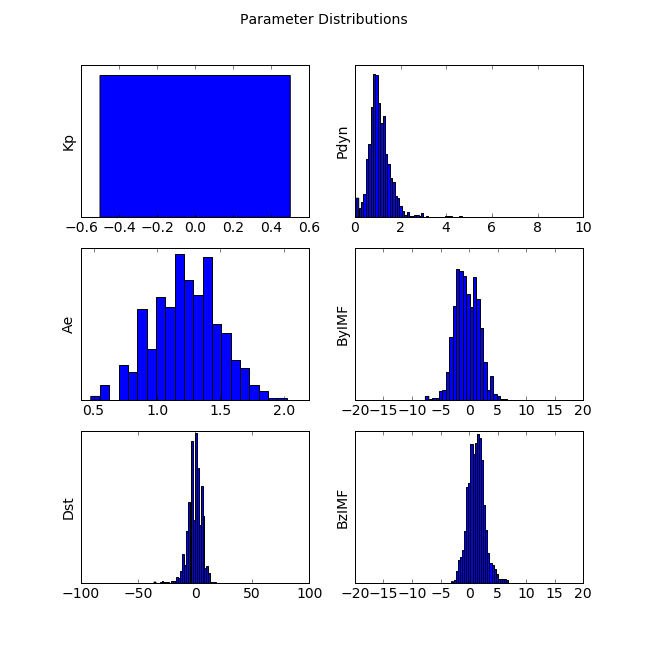

In [124]:
# Histograms:

kmask = [Kp==0]

fig, ax = plt.subplots(3,2)
# Kp
ax[0,0].hist(Kp[kmask], bins='auto')
ax[0,0].set_ylabel(('Kp'))

# Ae
ax[1,0].hist(Ae[kmask], bins='auto')
ax[1,0].set_ylabel(('Ae'))


# Dst
ax[2,0].hist(np.round(Dst[kmask]), bins='auto')
ax[2,0].set_ylabel('Dst')
ax[2,0].set_xlim([-100,100])

#Solar wind pressure
ax[0,1].hist(Pdyn.squeeze()[kmask], bins='auto')
ax[0,1].set_ylabel('Pdyn')
ax[0,1].set_xlim([0,10])
# ByIMF
ax[1,1].hist(ByIMF[kmask], bins='auto')
ax[1,1].set_ylabel('ByIMF')
ax[1,1].set_xlim([-20,20])

# BzIMF
ax[2,1].hist(BzIMF[kmask], bins='auto')
ax[2,1].set_ylabel('BzIMF')
ax[2,1].set_xlim([-20,20])

for x in [0,1,2]:
    ax[x,0].set_yticks([])
    ax[x,1].set_yticks([])

fig.suptitle('Parameter Distributions')
fig.savefig('parameter_histograms.png', ldpi=300)

<IPython.core.display.Javascript object>


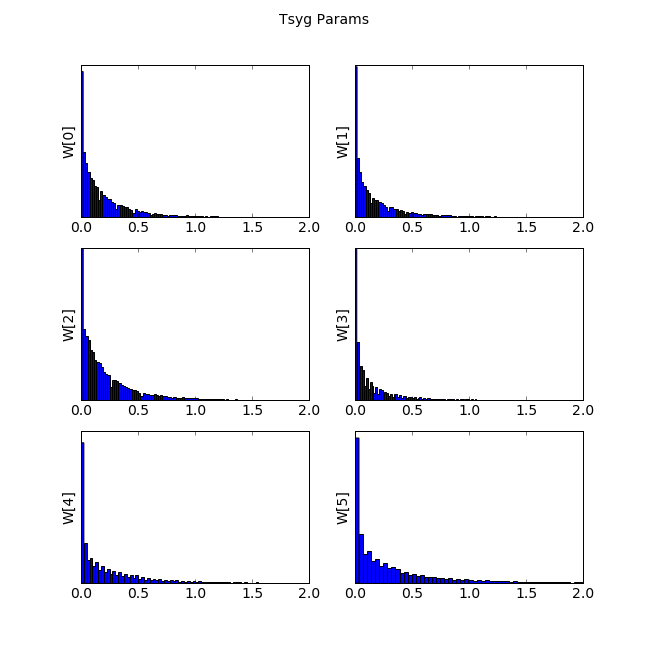

In [106]:
fig, ax = plt.subplots(3,2)
ax = ax.flatten()

for i in range(0,6):
    ax[i].hist(TS04_W[i,:],bins='auto')
    ax[i].set_xlim([0,2])
    ax[i].set_yticks([])
    ax[i].set_ylabel('W[%d]'%i)
fig.suptitle('Tsyg Params')

fig.savefig('tsyg_param_distributions.png', ldpi=300)

In [76]:
# stack everything:


M = np.vstack([Kp, Ae, Dst, Pdyn, ByIMF, BzIMF])

Maxvals = np.max(M, axis=1)
Minvals = np.min(M, axis=1)
print Maxvals
print Minvals
# pca = PCA()

# pca.fit(M)
# P = pca.transform(M)
# print np.shape(P)
# print P[0,:]

[  9.           3.31238895  59.          69.87        39.25        36.31      ]
[  0.00000000e+00   4.77121255e-01  -4.22000000e+02   5.00000000e-02
  -3.64800000e+01  -4.98600000e+01]


<IPython.core.display.Javascript object>


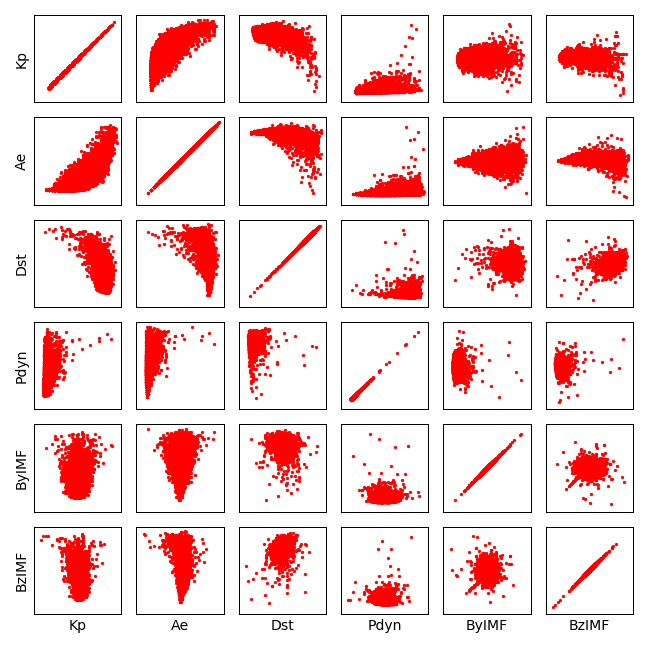

In [109]:
M = np.vstack([Kp, Ae, Dst, Pdyn, ByIMF, BzIMF])
names = ['Kp', 'Ae', 'Dst', 'Pdyn', 'ByIMF', 'BzIMF']

fig, ax = plt.subplots(len(names),len(names))
for i in range(0,len(names)):
    for j in range(0,len(names)):
#         if j < i+1:
        ax[i,j].scatter(M[i,:], M[j,:],marker='.', color='r')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
#         else:
#             ax[i,j].axis('off')

    ax[i,0].set_ylabel(names[i])
    ax[-1,i].set_xlabel(names[i])

fig.tight_layout()    
fig.savefig('parameter_correlations.png', ldpi=300)

In [68]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(M)
dists, inds = nbrs.kneighbors(M)

print inds
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
# distances, indices = nbrs.kneighbors(X)

[[0 1 3 5]
 [1 0 3 5]
 [2 5 4 1]
 [3 0 1 5]
 [4 1 0 3]
 [5 1 0 3]]


0 1.57538887835 -3.10346388952


<IPython.core.display.Javascript object>


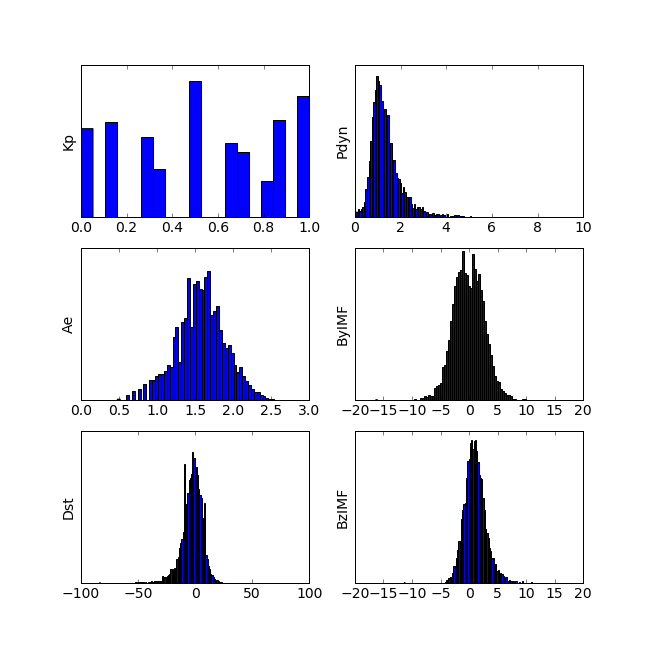

2 2.23109998293 -15.4394357559


<IPython.core.display.Javascript object>


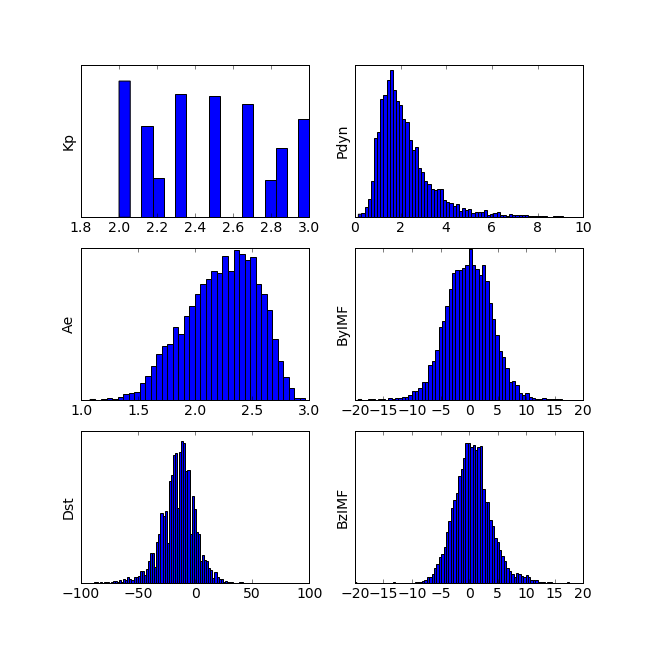

4 2.67214485658 -38.46025878


<IPython.core.display.Javascript object>


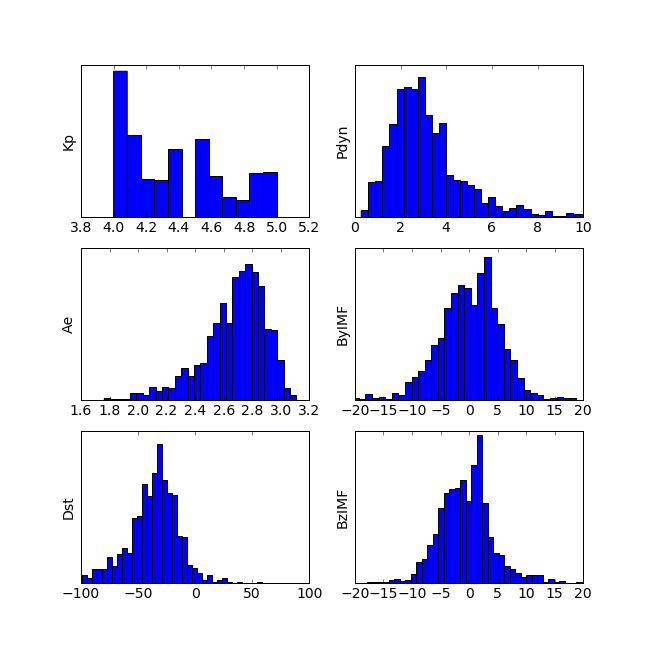

8 2.97100945651 -215.151515152


<IPython.core.display.Javascript object>


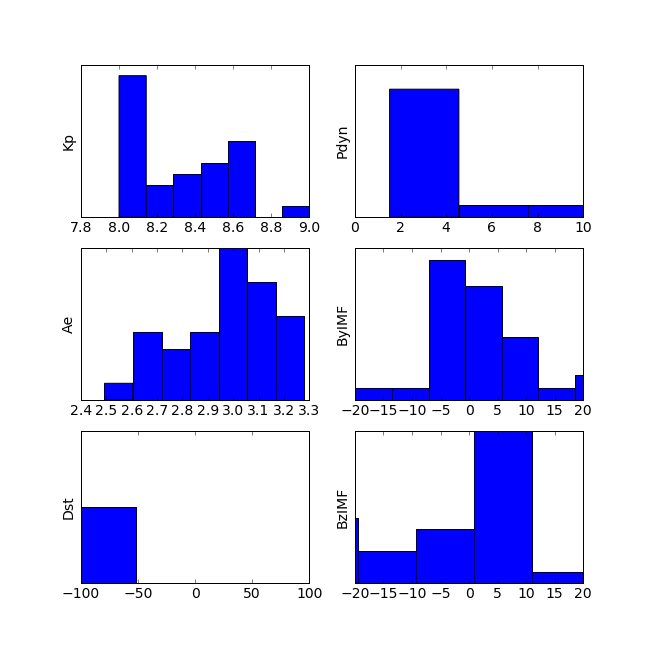

In [134]:
# Histograms:

for ktarg in [0, 2, 4, 8]:

    kmask = [(Kp>=ktarg) & (Kp<=ktarg+1)]
    
    Ae_targ = np.average([Ae[kmask]])
    Dst_targ = np.average([Dst[kmask]])
    
    print ktarg, Ae_targ, Dst_targ


    fig, ax = plt.subplots(3,2)
    # Kp
    ax[0,0].hist(Kp[kmask], bins='auto')
    ax[0,0].set_ylabel(('Kp'))

    # Ae
    ax[1,0].hist(Ae[kmask], bins='auto')
    ax[1,0].set_ylabel(('Ae'))


    # Dst
    ax[2,0].hist(np.round(Dst[kmask]), bins='auto')
    ax[2,0].set_ylabel('Dst')
    ax[2,0].set_xlim([-100,100])

    #Solar wind pressure
    ax[0,1].hist(Pdyn.squeeze()[kmask], bins='auto')
    ax[0,1].set_ylabel('Pdyn')
    ax[0,1].set_xlim([0,10])
    # ByIMF
    ax[1,1].hist(ByIMF[kmask], bins='auto')
    ax[1,1].set_ylabel('ByIMF')
    ax[1,1].set_xlim([-20,20])

    # BzIMF
    ax[2,1].hist(BzIMF[kmask], bins='auto')
    ax[2,1].set_ylabel('BzIMF')
    ax[2,1].set_xlim([-20,20])

    for x in [0,1,2]:
        ax[x,0].set_yticks([])
        ax[x,1].set_yticks([])

#     fig.suptitle('Parameter Distributions')
#     fig.savefig('parameter_histograms.png', ldpi=300)

In [149]:
# Find mean parameter values for set values of K:
for ktarg in [0, 2, 4, 6, 8]:
    
    kmask = [(Kp>=ktarg) & (Kp<=ktarg+1)]
    
    Ae_targ   = round(10.*np.average([Ae[kmask]]))/10.
    Dst_targ  = round(np.average([Dst[kmask]]))
    Pdyn_targ = round(10.*np.average([Pdyn[kmask]]))/10.
    ByIMF_targ= round(100.*np.average([ByIMF[kmask]]))/100.
    BzIMF_targ= round(100.*np.average([BzIMF[kmask]]))/100.

    
    W_targ = np.sum(TS04_W, axis=1)/np.shape(TS04_W)[1]
#     print W_targ
#     print np.shape(TS04_W)
    
    
    print ktarg, Ae_targ, Dst_targ, Pdyn_targ, ByIMF_targ, BzIMF_targ



0 1.6 -3.0 1.4 -0.12 1.03
2 2.2 -15.0 2.3 -0.09 0.63
4 2.7 -38.0 3.4 0.08 -0.53
6 2.9 -96.0 5.8 0.56 -2.29
8 3.0 -215.0 7.7 -0.21 -9.17
